In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr_frozen_09272019.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))
lsl_dr.head()

,redcap_event_name,academic_year_rv,hl,male,_race,prim_lang,sib,_mother_ed,father_ed,par1_ed,...,gf3_sis_ss,gf3_siw_ss,gf_version,ppvt_f,ppvt_ss,rowpvt_ss,school,score,test_name,test_type
0,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101,58.0,NaN,EOWPVT
1,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101,51.0,PLS,receptive
2,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101,60.0,PLS,expressive
3,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101,54.0,PLS,total
4,initial_assessment_arm_1,2011.0,0.0,0.0,2.0,0.0,1.0,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,626,50.0,PLS,receptive


# Receptive vocabulary

Model:

    ppvt_ss ~ rowpvt_ss + age_test_rowpvt + sex + lang_cat + onset_1 + age_amp + age + sib

In [3]:
receptive_vocabulary_data = lsl_dr.query('domain=="Receptive Vocabulary"')

In [4]:
regression_subset = receptive_vocabulary_data[['rowpvt_ss', 'ppvt_ss', 'age_test_rowpvt', 'sex', 'non_english', 'age_amp', 'age', 'sib']].dropna()
regression_subset['female'] = regression_subset.sex.replace({'Male':0, 'Female':1})
regression_subset['non_english'] = regression_subset.non_english.astype(int)
regression_subset = regression_subset.drop('sex', axis=1)

In [5]:
X = regression_subset.copy()
y = X.pop('ppvt_ss')

In [6]:
receptive_vocab_model = linear_model.LinearRegression()
receptive_vocab_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
X_pred = receptive_vocabulary_data.loc[receptive_vocabulary_data.ppvt_ss.isnull(), ['rowpvt_ss', 'age_test_rowpvt', 'sex', 'non_english', 'age_amp', 'age', 'sib']]
X_pred['female'] = X_pred.sex.replace({'Male':0, 'Female':1})
X_pred['non_english'] = X_pred.non_english.astype(float)
X_pred = X_pred.drop('sex', axis=1)
X_pred.mean()

rowpvt_ss          90.196375
age_test_rowpvt    61.527470
non_english         0.260632
age_amp            15.992282
age                29.366130
sib                 1.201238
female              0.512083
dtype: float64

In [8]:
X_pred = X_pred.fillna(X_pred.mean())

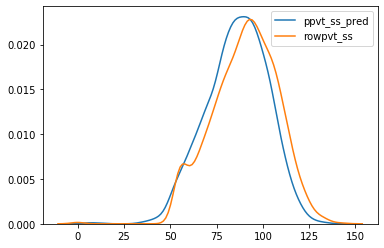

In [9]:
ppvt_ss_pred = receptive_vocab_model.predict(X_pred)
sns.kdeplot(ppvt_ss_pred, label='ppvt_ss_pred')
sns.kdeplot(X_pred.rowpvt_ss);

# Expressive vocabulary

Model:

    evt_ss ~ eowpvt_ss + age_test_eowpvt + sex + 
                        lang_cat + onset_1 + age_amp + age + sib

In [10]:
expressive_vocabulary_data = lsl_dr.query('domain=="Expressive Vocabulary"')

In [11]:
regression_subset = expressive_vocabulary_data[['evt_ss', 'eowpvt_ss', 'age_test_eowpvt', 'sex', 'non_english', 'age_amp', 'age', 'sib']].dropna()
regression_subset['female'] = regression_subset.sex.replace({'Male':0, 'Female':1})
regression_subset['non_english'] = regression_subset.non_english.astype(int)
regression_subset = regression_subset.drop('sex', axis=1)

In [12]:
X = regression_subset.copy()
y = X.pop('evt_ss')

In [13]:
expressive_vocab_model = linear_model.LinearRegression()
expressive_vocab_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
X_pred = expressive_vocabulary_data.loc[expressive_vocabulary_data.evt_ss.isnull(), ['eowpvt_ss', 'age_test_eowpvt', 'sex', 'non_english', 'age_amp', 'age', 'sib']]
X_pred['female'] = X_pred.sex.replace({'Male':0, 'Female':1})
X_pred['non_english'] = X_pred.non_english.astype(float)
X_pred = X_pred.drop('sex', axis=1)
X_pred.mean()

eowpvt_ss          88.186816
age_test_eowpvt    62.422010
non_english         0.231745
age_amp            15.940184
age                29.914061
sib                 1.206345
female              0.508304
dtype: float64

In [15]:
X_pred = X_pred.fillna(X_pred.mean())

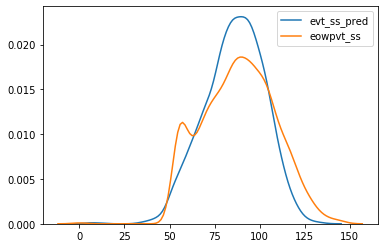

In [16]:
evt_ss_pred = receptive_vocab_model.predict(X_pred)
sns.kdeplot(ppvt_ss_pred, label='evt_ss_pred')
sns.kdeplot(X_pred.eowpvt_ss);

# Articulation

Model: 

    aaps_ss ~ gf2_ss + age_test_gf2 + sex + 
                        lang_cat + onset_1 + age_amp + age + sib

In [17]:
articulation_data = lsl_dr.query('domain=="Articulation"')

In [18]:
regression_subset = articulation_data[['aaps_ss', 'gf2_ss', 'age_test_gf2', 'sex', 'non_english', 'age_amp', 'age', 'sib']].dropna()
regression_subset['female'] = regression_subset.sex.replace({'Male':0, 'Female':1})
regression_subset['non_english'] = regression_subset.non_english.astype(int)
regression_subset = regression_subset.drop('sex', axis=1)

In [19]:
X = regression_subset.copy()
y = X.pop('aaps_ss')

In [20]:
articulation_model = linear_model.LinearRegression()
articulation_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
X_pred = articulation_data.loc[articulation_data.evt_ss.isnull(), ['gf2_ss', 'age_test_gf2', 'sex', 'non_english', 'age_amp', 'age', 'sib']]
X_pred['female'] = X_pred.sex.replace({'Male':0, 'Female':1})
X_pred['non_english'] = X_pred.non_english.astype(float)
X_pred = X_pred.drop('sex', axis=1)
X_pred.mean()

gf2_ss          82.362031
age_test_gf2    67.463770
non_english      0.148905
age_amp         18.104089
age             35.095992
sib              1.215069
female           0.473243
dtype: float64

In [22]:
X_pred = X_pred.fillna(X_pred.mean())

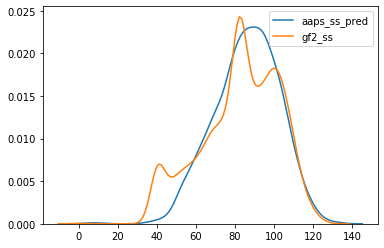

In [23]:
aaps_ss_pred = receptive_vocab_model.predict(X_pred)
sns.kdeplot(ppvt_ss_pred, label='aaps_ss_pred')
sns.kdeplot(X_pred.gf2_ss);

# Receptive Language

# Expressive Language